In [6]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size):
       
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)

    def sigmoid(self, x):
        
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs):
       
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.sigmoid(weighted_sum)
        return output


input_size = 3  
neural_network = NeuralNetwork(input_size)


input_data = np.array([0.5, 0.3, 0.8])


output = neural_network.forward(input_data)

print("Input:", input_data)
print("Output:", output)


Input: [0.5 0.3 0.8]
Output: [0.79804418 0.74687036 0.61887074 0.64038426 0.75750748 0.61789483
 0.65393217 0.73580829 0.76268486 0.75538131 0.6681501  0.76633662
 0.67102174 0.6901799  0.77242449 0.75495082 0.78997657 0.75642411
 0.73959592 0.63858676 0.69915485 0.67716271 0.67250801 0.80977846
 0.70446648 0.79699331 0.75151327 0.78080644 0.72675049 0.7412479
 0.72473633 0.66168311 0.7681711  0.68055709 0.62243037 0.75418029
 0.65761222 0.80471362 0.80682174 0.80066011 0.69966844 0.62034608
 0.80279876 0.71171848 0.80879752 0.80832776 0.79060404 0.68352299
 0.70279822 0.79029383 0.68836418 0.65589492 0.73737357 0.80403639
 0.7634324  0.73993331 0.63939455 0.74848867 0.81238992 0.64922738
 0.72985567 0.79460886 0.77141695 0.76361042 0.76459608 0.69742207
 0.68333756 0.78328643 0.7834141  0.79292262 0.80040081 0.72847581
 0.72652786 0.78140211 0.75501206 0.76450298 0.78097435 0.79666285
 0.69286674 0.70080701 0.63865765 0.74151178 0.62515876 0.71933367
 0.73462289 0.68180993 0.74391056 

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, max_iterations=1000):
       
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)
        
        
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations

    def predict(self, inputs):
        
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        
        prediction = np.where(weighted_sum > 0, 1, 0)
        return prediction

    def train(self, training_data, labels):
        for iteration in range(self.max_iterations):
            errors = 0
            for inputs, label in zip(training_data, labels):
               
                prediction = self.predict(inputs)

                
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

                errors += np.abs(error)

            
            if errors == 0:
                print(f"Converged in {iteration+1} iterations.")
                break

        if errors != 0:
            print("Did not converge within the specified number of iterations.")


input_size = 2 
perceptron = Perceptron(input_size)


training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


labels = np.array([0, 0, 0, 1])


perceptron.train(training_data, labels)


test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = perceptron.predict(test_data)

print("Test Predictions:", predictions)


Converged in 6 iterations.
Test Predictions: [0 0 0 1]


Epoch 0/100, Accuracy: 50.00%
Epoch 10/100, Accuracy: 100.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 40/100, Accuracy: 100.00%
Epoch 50/100, Accuracy: 100.00%
Epoch 60/100, Accuracy: 100.00%
Epoch 70/100, Accuracy: 100.00%
Epoch 80/100, Accuracy: 100.00%
Epoch 90/100, Accuracy: 100.00%


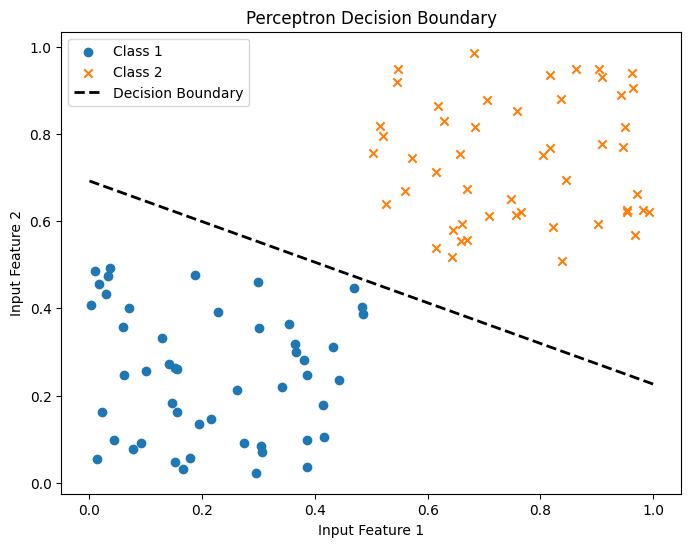

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
       
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation >= 0 else -1

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)

                
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)

            if epoch % 10 == 0:
                accuracy = self.evaluate(training_data, labels)
                print(f"Epoch {epoch}/{self.epochs}, Accuracy: {accuracy:.2%}")

    def evaluate(self, inputs, labels):
        predictions = np.array([self.predict(x) for x in inputs])
        accuracy = np.mean(predictions == labels)
        return accuracy

    def decision_boundary(self, x):
        
        return -(self.weights[0] * x + self.bias) / self.weights[1]


input_size = 2  
perceptron = Perceptron(input_size)


np.random.seed(42)
class_1 = np.random.rand(50, input_size) * 0.5
class_2 = np.random.rand(50, input_size) * 0.5 + 0.5
training_data = np.concatenate((class_1, class_2), axis=0)
labels = np.concatenate((np.ones(50), -np.ones(50)))


perceptron.train(training_data, labels)


plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', marker='x')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')


x_boundary = np.linspace(0, 1, 100)
y_boundary = perceptron.decision_boundary(x_boundary)
plt.plot(x_boundary, y_boundary, color='black', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()
